## Projekt om modellering og simulering

En satellits bevægelse i Jordens tyngdefelt kan beskrives med Newtons gravitationslov. Ifølge Newtons gravitationslov virker der en tyngdekraft mellem Jorden og satellitten, hvis størrelse er
$F=GMm/r^2$, hvor $M=5.97\cdot 10^{24}\text{ kg}$ er Jordens masse, $m$ er satellittens masse og $r$ er afstanden fra Jordens centrum til satellitten. Konstanten, $G=6.674\cdot 10^{-11} \text{N}\cdot \text{m}^2/\text{kg}^2$, er gravitationskonstanten.

Jordens radius er $R=6370\text{ km}$.
Det antages at Jorden er stationær og placeret i origo.

Projektet består af en række opgaver der skal løses med brug af metoder fra kurset der er introduceret indtil nu.

Newtons anden lov for satellittens bevægelse er
>$m\ddot {\vec r}=-G\frac{Mm}{r^2}\frac{\vec r}{r}$.

eller opskrevet i $xy$-koordinater
>$m\ddot x =-G\frac{Mm}{(x+y)^{3/2}}x$

>$m\ddot y =-G\frac{Mm}{(x+y)^{3/2}}y$

eller opskrevet i polærere koordinater.
>$m\left(\ddot r-r\dot \theta^2\right)=-G\frac{Mm}{r^2}$

>$m\left(r\ddot \theta+2\dot r\dot\theta \right)=0$

Besvarelsen af projektet skal være en Jupyter Notebook, fx kan man indsætte svar i dette dokument.

In [2]:
M_jord = 5.97e24
Gravkons = 6.674e-11
R_jord = 6370.e3

### Servicesatellit

En servicesatellit skal bevæge sig i en cirkulær bane omkring Jorden, med en baneradius $3R$.

>a) Bestem farten af satellitten i banen ved symbolsk regning i Python.

>b) Beregn den numeriske værdi af farten i banerne med radius $3R$ og $5R$.

>c) Plot satellittens bane ved at løse bevægelsesligningerne og tegn i samme plot Jorden samt en ret linje mellem koordinaterne (5R,-5R) og (5R,5R) (har at gøre med næste opgave).

In [3]:
import sympy as sp
import numpy as np
M_jord = 5.97e24
Gravkons = 6.674e-11
R_jord = 6370.e3

R,F_cen,M,v,r,G,a_cen,a = sp.symbols('R,F_cen,M,v,r,G,a_cen,a')

# a
vel = sp.Eq(v,sp.sqrt(3*R*a))
acc = sp.Eq(a_cen,-G*(M/(3*R)**2))

display(vel)
display(acc)
asattelit =-Gravkons*(M_jord/(R_jord*3)**2)
vsattelit = (sp.sqrt(np.abs((3*R_jord)*asattelit)))

print(asattelit)
display(vsattelit)
vnum = sp.Eq(v,sp.sqrt(3*R*a_cen))



Eq(v, sqrt(3)*sqrt(R*a))

Eq(a_cen, -G*M/(9*R**2))

-1.091036197113793


4566.14736149027

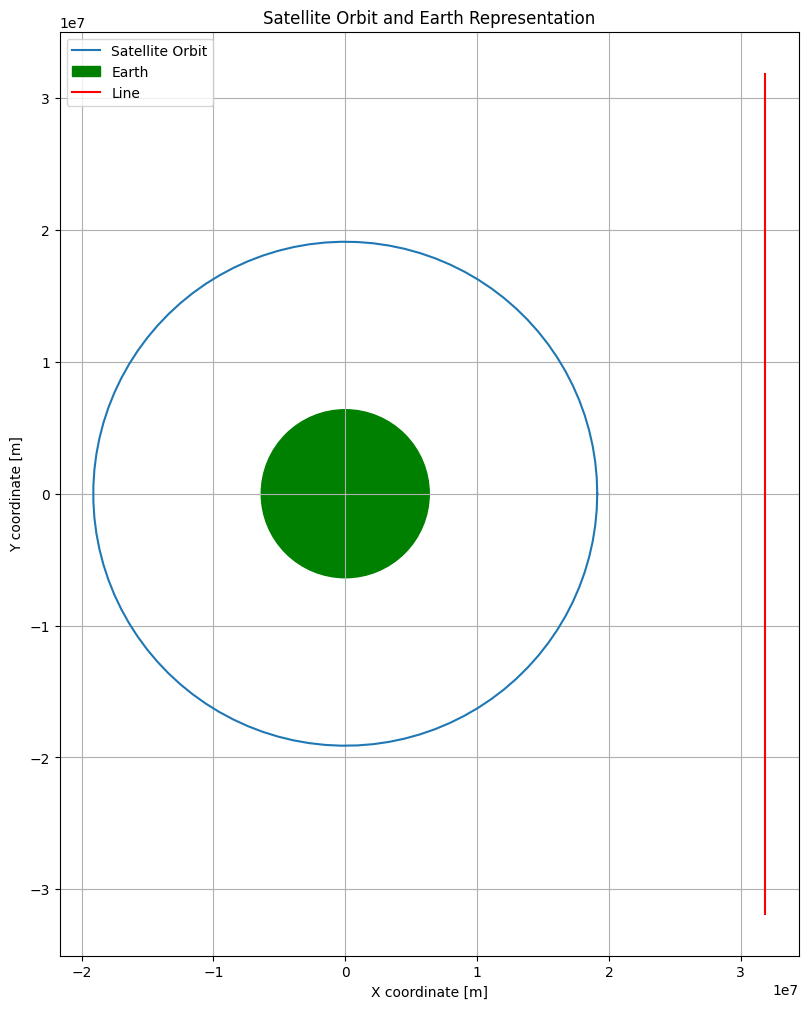

In [9]:
import numpy as np
from scipy.integrate import solve_ivp as sol
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt

M_earth = 5.97e24 
G_const = 6.674e-11  
R_earth = 6371e3  


orbit_radius = 3 * R_earth  


theta = np.linspace(0, 2 * np.pi, 100)  
x_orbit = orbit_radius * np.cos(theta)  
y_orbit = orbit_radius * np.sin(theta)  


earth_radius = R_earth
earth_circle = plt.Circle((0, 0), earth_radius, color='green', label='Earth')


fig, ax = plt.subplots(figsize=(12, 12))


ax.plot(x_orbit, y_orbit, label='Satellite Orbit')


ax.add_artist(earth_circle)


ax.plot([5 * earth_radius, 5 * earth_radius], [5 * earth_radius, -5 * earth_radius], color='red', label='Line')


ax.set_aspect('equal')
ax.set_xlabel('X coordinate [m]')
ax.set_ylabel('Y coordinate [m]')
ax.set_title('Satellite Orbit and Earth Representation')


ax.grid(True)
ax.legend()

plt.show()



### Overvågningskabine

<table>
<tr>
<td align='bottom'>Vi ønsker at opsende en overvågningskabine der skal obserevere Jorden. Kabinen skal placeres så den glider på en lang, tynd, friktionsfri, stiv wire der fastholdes som vist i figuren (fastholdelsesmekanismen er ikke vist i figuren).

Kabinen, der har massen, $m$, bevæger sig op og ned på wiren i en periodisk bevægelse i afstanden, $L$ fra Jordens centrum, under påvirkning af tyngdekraften fra Jorden. 

Det ønskes at kabinen befinder sig i den vandrette afstand af $L=5R$ og at den starter fra hvile i en højde, $3R$, dvs. så $\theta \approx 31^{\text{o}}$.


>a) Opstil kabinens bevægelsesligning, $m\ddot x =\ldots$.

>b) Bestem perioden af kabinens svingning og angiv denne i timer.

>c) Bestem den højde som kabinen skal starte i hvis dens periode skal være 24 timer.
</td>
<td><img src="Projekt1.png" width="600"/></td>
</tr>
</table>






In [14]:
#Opgave a)
import sympy as sp
import numpy as np


m,x_prik,G,M_jord,m_satt,L,x = sp.symbols('m,x_prik,G,M_jord,m_satt,L,x')

mx = sp.Eq(m*x_prik,-G*((M_jord*m_satt)/(L**2+x**2)**(3/2))*x)

display(mx)



Eq(m*x_prik, -G*M_jord*m_satt*x/(L**2 + x**2)**1.5)

##### Eksempel på kode der varierer starthastigheden og beregner tiden som det tager en kabine at nå det højeste punkt. Koden er ikke en del af løsningen men kan måske inspirere.

In [23]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
L = 5 * R
def f(t,y):
    x,v = y
    return [v,...]
def top_point(t,y):
    x,v = y
    return v 
top_point.direction = -1
top_point.terminal = True
t = np.linspace(0,1000000,10000)
for v0 in np.linspace(100,2000,21):
    sol = solve_ivp(f,[0,1000000],t_eval=t,y0=[0,v0],events=[top_point],atol=1e-8,rtol=1e-8)
    T = sol.t_events[0][0]
    print('v0 = {:.2f} m/s T={:.2f} timer'.format(v0,T/60/60))

v0 = 100.00 m/s T=3.93 timer
v0 = 195.00 m/s T=3.94 timer
v0 = 290.00 m/s T=3.94 timer
v0 = 385.00 m/s T=3.96 timer
v0 = 480.00 m/s T=3.97 timer
v0 = 575.00 m/s T=3.99 timer
v0 = 670.00 m/s T=4.01 timer
v0 = 765.00 m/s T=4.04 timer
v0 = 860.00 m/s T=4.06 timer
v0 = 955.00 m/s T=4.10 timer
v0 = 1050.00 m/s T=4.13 timer
v0 = 1145.00 m/s T=4.18 timer
v0 = 1240.00 m/s T=4.22 timer
v0 = 1335.00 m/s T=4.27 timer
v0 = 1430.00 m/s T=4.33 timer
v0 = 1525.00 m/s T=4.39 timer
v0 = 1620.00 m/s T=4.46 timer
v0 = 1715.00 m/s T=4.53 timer
v0 = 1810.00 m/s T=4.61 timer
v0 = 1905.00 m/s T=4.70 timer
v0 = 2000.00 m/s T=4.80 timer


#### Hohmann-bane for servicesatellitten

Det er nødvendigt at servicesatellitten engang imellem skifter fra sin cirkulære bane til en mere ydreliggende cirkulær bane. Den ydreliggende bane skal tangere overvågningskabinens lodrette bane, i afstanden $5R$ fra Jordens centrum. Dette kan opnås ved at ændre hastigheden af satellitten i et punkt i dens normale bane, så den følger en overførelsesbane, indtil den når den ydreliggende bane. Der skal hastigheden igen ændres. En sådan overførelsesbane kaldes for en Hohmann-bane, og den er den mest energieffektive overførelsesbane.

For enkelhedens skyld antages det at massen af satellitten ikke ændres
under manøvrerne.
Det vil sige at brændstofforbruget antages forsvindende (I er velkomne til at udvide modellen til kortvarige brændstofforbrug med skønnede massetab). Massen sættes til $m=100\text{ kg}$.

>a) Find den hastighedsændring af satellitten som leder til at den kan nærme sig og ramme den ydreliggende cirkulære bane tangentielt. Hvor lang tid tager overførelsen mellem banerne?

>b) Find nu hastighedsændringen for at satellitten kan fortsætte på den ydreliggende cirkulære bane.

>c) Bestem den energi det har kostet at skifte bane.

>d) Visualisér vha. plots i Python overførelsesbanen sammen med de to cirkulære baner.

### Perioden af satellitbevægelse omkring Jorden

Det er nødvendigt, for at kunne vælge det korrekte afsendelsestidspunkt til overførselsbanen, så servicesatellitten kan møde en anden satellit, at vide hvordan perioden af satellittens bevægelse
afhænger af radius. 
Derfor ønskes det undersøgt på empirisk grundlag hvordan perioden af en satellits bevægelse omkring Jorden afhænger af afstanden til Jorden. Der er ingen tilgængelige data om dette, til gengæld er der 
nedenfor, for en række planeter og en enkelt dværgplanet, angivet den gennemsnitlige afstand til Solen og perioden for planeternes bevægelse omkring Solen.

>a) Undersøg vha. forskellige plots hvordan perioden afhænger af den gennemsnitlige afstand til Solen. Hvilken type af funktionel afhængighed er der tale om?

>b) Foretag en regressionsanalyse med den i a) bestemte model.

>c) Undersøg vha. karakteristiske skalaer eller dimensionsanalyse hvordan perioden, $T$, afhænger af den gennemsnitlige afstand, $R$, Solens masse, $M$ og gravitationskonstanten, $G$.

In [31]:
import numpy as np
planet = ['Mercury','Venus','Earth','Mars','Jupiter','Saturn','Uranus','Neptune','Pluto']
mean_distance = [5.97e10,1.08e11,1.496e11,2.28e11,7.78e11,1.43e12,2.87e12,4.50e12,5.91e12]
period = [7.60e6,1.94e7,3.156e7,5.94e7,3.74e8,9.29e8,2.65e9,5.18e9,7.82e9]